In [80]:
%load_ext autoreload
%autoreload 2
from get import *
from sklearn.manifold import TSNE
from matplotlib import cm



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
# Load data
X_labeled, y_labeled, X_unlabeled, X_val = load_datasets(n_dataset=23)
display_dataset(23)
X_all = torch.concat((X_labeled, X_unlabeled, X_val))
labels_all = np.concatenate((y_labeled, np.zeros(X_unlabeled.shape[0]), np.ones(X_val.shape[0])))


In [82]:
print(X_labeled.shape)
print(X_unlabeled.shape)
print(X_val.shape)
print(X_all.shape)


torch.Size([1209, 198])
torch.Size([3626, 198])
torch.Size([1209, 198])
torch.Size([6044, 198])


In [83]:
# Project data and get projector
def get_2d_repr(embeddings):
    tsne = TSNE(2, verbose=1)
    tsne_proj = tsne.fit_transform(embeddings)
    return tsne, tsne_proj

tsne, repr_2d = get_2d_repr(X_all)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6044 samples in 0.001s...


/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 6044 samples in 1.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6044
[t-SNE] Computed conditional probabilities for sample 2000 / 6044
[t-SNE] Computed conditional probabilities for sample 3000 / 6044
[t-SNE] Computed conditional probabilities for sample 4000 / 6044
[t-SNE] Computed conditional probabilities for sample 5000 / 6044
[t-SNE] Computed conditional probabilities for sample 6000 / 6044
[t-SNE] Computed conditional probabilities for sample 6044 / 6044
[t-SNE] Mean sigma: 26.746048
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.483025
[t-SNE] KL divergence after 1000 iterations: 2.329716


In [84]:
print(X_val[1])

tensor([ -3.9789,  -7.5372, -12.8021,  -0.2070,  -9.6734,  -8.6275, -25.6657,
        -27.8904, -20.9566,   7.8224,  20.7664, -21.6880, -34.6289, -23.6542,
         12.8971, -12.3932, -19.2576,   1.9127, -20.4970,  -6.8923,  -9.6330,
         -7.2850,  -7.2546, -12.0156, -18.6349,  -5.4444,  -7.2265, -24.6333,
        -11.2162,   5.0958, -31.5782,   1.3624, -13.7249,  -9.8555, -13.8539,
        -11.5910, -21.2315,   8.1359, -19.3953,  11.0537,  -4.9475,  -3.9428,
          3.1294, -17.8930,  -7.5487,  -2.3454,  -4.8922,  -5.1267,  -9.1420,
        -11.6484, -27.8315,   6.1522,  10.0762,  -7.0852, -23.9296,  -6.5885,
         -8.2231,   2.1918, -25.4526,  -5.0289, -24.0135,  -2.7539, -13.6184,
        -11.3019, -17.8081,  -7.7034,  -8.5942,  -4.8723, -30.1715,  -7.1345,
         -9.0860,  -7.2649,  -8.4739, -11.9240, -23.5771,  -6.8576, -17.2218,
         -7.9044, -13.3042,  14.7245, -27.6600,  -8.3681, -18.6949,  -5.9622,
         -6.9581, -10.2116, -14.9249, -15.6675, -16.9678, -30.95

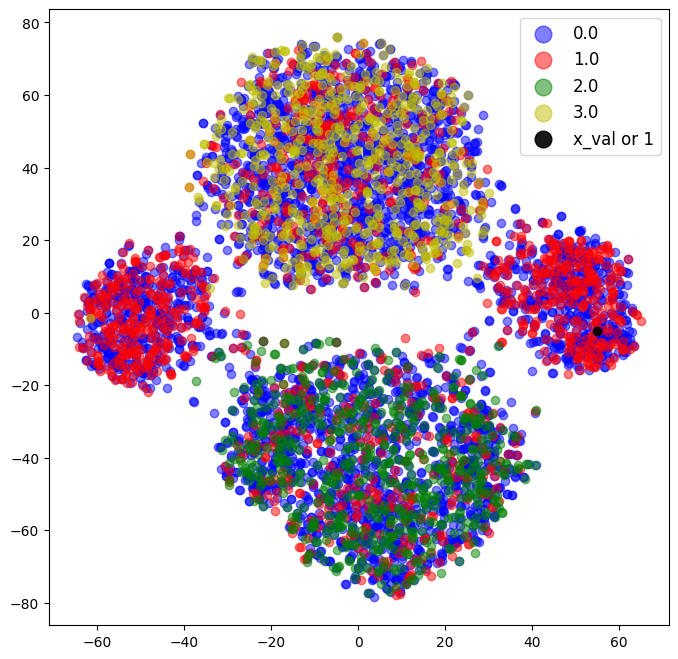

In [85]:
# Create a two dimensional t-SNE projection of the embeddings.
# Plot the points. We obserbe 4 clusters.
n_low = 9
def plot_embedding_2d(embeddings, repr_2d, labels = None, title=None, plot_x_val_2d_repr = True):
    if labels is None:
        labels = np.zeros(embeddings.shape[0])
    # Plot those points as a scatter plot and label them based on the pred labels
    colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']
    fig, ax = plt.subplots(figsize=(8,8))
    for lab in np.unique(labels):
        indices = labels==lab
        ax.scatter(repr_2d[indices,0], repr_2d[indices,1], c=colors[lab.astype(np.int32)], label = lab ,alpha=0.5)
    if plot_x_val_2d_repr:
        ax.scatter(repr_2d[labels == 1, 0][n_low], repr_2d[labels == 1, 1][n_low], c='k', label = 'x_val or 1' ,alpha=0.9)
    ax.legend(fontsize='large', markerscale=2)
    plt.show()
    
plot_embedding_2d(X_all, repr_2d = repr_2d ,labels = labels_all)

In [86]:
plot_embedding_2d(X_unlabeled)

TypeError: plot_embedding_2d() missing 1 required positional argument: 'repr_2d'

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1209 samples in 0.000s...


/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 1209 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1209
[t-SNE] Computed conditional probabilities for sample 1209 / 1209
[t-SNE] Mean sigma: 32.718935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.751244
[t-SNE] KL divergence after 1000 iterations: 1.350075


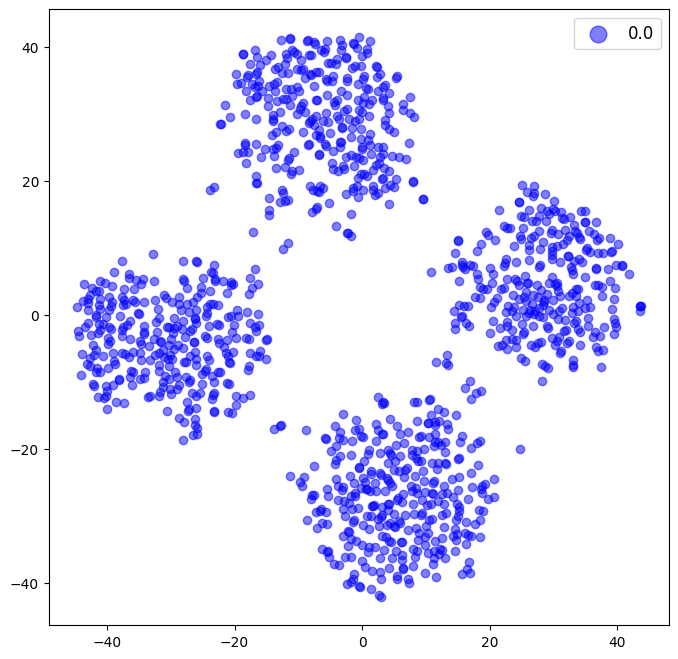

In [ ]:
plot_embedding_2d(X_val)

In [ ]:
from time import time

from pykeops.torch import LazyTensor
use_cuda = torch.cuda.is_available()
dtype = torch.float32 if use_cuda else torch.float64
device_id = "cuda:0" if use_cuda else "cpu"

embeddings_all = torch.concat((X_labeled, X_unlabeled, X_val))
# tsne_proj = get_2d_repr(embeddings_all)
# tsne_proj = torch.tensor(tsne_proj, dtype=dtype, device=device_id)
K_clusters = 4
N, D, K = embeddings_all.shape[0], embeddings_all.shape[1], K_clusters

print(N, D, K)

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode
6044 198 4


In [ ]:
# Cluster the points

def KMeans(x, K=10, Niter=10, verbose=True):
    """Implements Lloyd's algorithm for the Euclidean metric."""

    start = time()
    N, D = x.shape  # Number of samples, dimension of the ambient space

    c = x[:K, :].clone()  # Simplistic initialization for the centroids

    x_i = LazyTensor(x.view(N, 1, D))  # (N, 1, D) samples
    c_j = LazyTensor(c.view(1, K, D))  # (1, K, D) centroids

    # K-means loop:
    # - x  is the (N, D) point cloud,
    # - cl is the (N,) vector of class labels
    # - c  is the (K, D) cloud of cluster centroids
    for i in range(Niter):

        # E step: assign points to the closest cluster -------------------------
        D_ij = ((x_i - c_j) ** 2).sum(-1)  # (N, K) symbolic squared distances
        cl = D_ij.argmin(dim=1).long().view(-1)  # Points -> Nearest cluster

        # M step: update the centroids to the normalized cluster average: ------
        # Compute the sum of points per cluster:
        c.zero_()
        c.scatter_add_(0, cl[:, None].repeat(1, D), x)

        # Divide by the number of points per cluster:
        Ncl = torch.bincount(cl, minlength=K).type_as(c).view(K, 1)
        c /= Ncl  # in-place division to compute the average

    if verbose:  # Fancy display -----------------------------------------------
        if use_cuda:
            torch.cuda.synchronize()
        end = time()
        print(
            f"K-means for the Euclidean metric with {N:,} points in dimension {D:,}, K = {K:,}:"
        )
        print(
            "Timing for {} iterations: {:.5f}s = {} x {:.5f}s\n".format(
                Niter, end - start, Niter, (end - start) / Niter
            )
        )

    return cl, c


cluster_classes_all, c = KMeans(embeddings_all, K)
print("Centroids: ", c.shape)
print("Labels: ", cluster_classes_all.shape)
print(cluster_classes_all[10:])

K-means for the Euclidean metric with 6,044 points in dimension 198, K = 4:
Timing for 10 iterations: 0.03017s = 10 x 0.00302s

Centroids:  torch.Size([4, 198])
Labels:  torch.Size([6044])
tensor([1, 3, 3,  ..., 3, 2, 1])


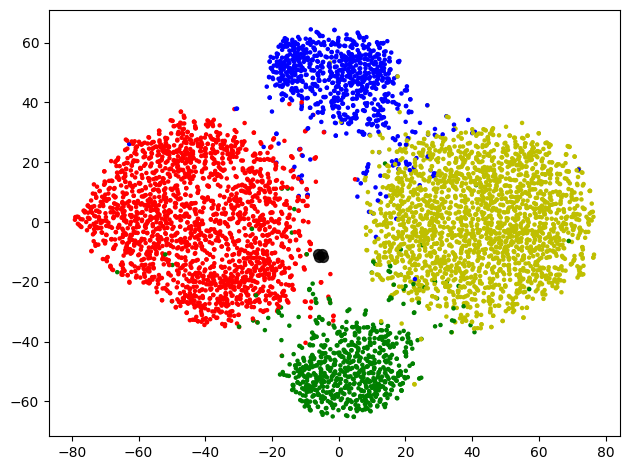

In [ ]:
plt.figure()
colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']
colors2 = [colors[i] for i in cluster_classes_all]
plt.scatter(repr_2d[:, 0], repr_2d[:, 1], c=colors2, s=30000 / len(repr_2d))
plt.scatter(c[:, 0], c[:, 1], c="black", s=50, alpha=0.8)
# plt.axis([-2, 2, -2, 2])
plt.tight_layout()
plt.show()


In [ ]:

# BLUE = cluster 0 = label 3
# RED = cluster 1 = label 2
# GREEN = cluster 2 = label 2
# YELLOW = cluster 3 = label 3

cluster_classes_all # [cluster class of i for i in range(N)]

classes_all = cluster_classes_all.clone()     # [class 2 or 3 of i for i in range(N)]
classes_all[cluster_classes_all == 0] = 3
classes_all[cluster_classes_all == 1] = 2
classes_all[cluster_classes_all == 3] = 3
classes_all[cluster_classes_all == 2] = 2

classes_val = classes_all[labels_all == 1]

print(classes_val.shape)

torch.Size([1209])


In [ ]:
df = pd.DataFrame(classes_val)
df.to_csv(f"submission_23.csv", header=False, index=False)